In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score, silhouette_samples

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import preprocessing
import warnings
from kneed import KneeLocator

warnings.filterwarnings('ignore')

# Given the correlation matrix (cm) returns the couples of variables that have a higher than threshold corr.
def get_high_correlation_indexes(cm, threshold):
    high_indexes = np.where(np.abs(cm) > threshold)
    high_indexes = [(cm.index[x], cm.columns[y]) for x, y in zip(*high_indexes)
                                        if x != y and x < y]
    return high_indexes

def print_high_correlations(cm, threshold = 0.5):
    cm = df.corr()
    hi = get_high_correlation_indexes(cm, threshold)
    for index in hi:
        print(f"{index[0]} x {index[1]}\n")

In [2]:
df = pd.read_csv(r"data/data_understanding_output.csv",skipinitialspace=True)
df_train = df.drop(['word','PoS', 'polysemy', 'length', 'number_of_meanings', 'avg_variance_between_meanings', 'sentiment'], axis=1)
print_high_correlations(df, 0.4)

length x aoa

arousal x semsize

valence x dominance

valence x sentiment

dominance x sentiment

concreteness x imageability

concreteness x semsize

imageability x aoa

familiarity x aoa

familiarity x log_freq

aoa x log_freq

polysemy x number_of_meanings

polysemy x avg_variance_between_meanings

number_of_meanings x avg_variance_between_meanings



In [3]:
df.corr()

length   arousal   valence  dominance  \
length                         1.000000  0.158401  0.035209   0.005979   
arousal                        0.158401  1.000000  0.326418   0.362653   
valence                        0.035209  0.326418  1.000000   0.723138   
dominance                      0.005979  0.362653  0.723138   1.000000   
concreteness                  -0.199510 -0.248671  0.056234   0.036157   
imageability                  -0.204197 -0.084990  0.092339   0.068979   
familiarity                   -0.118623  0.180115  0.244815   0.193922   
aoa                            0.400869 -0.005560 -0.189220  -0.130277   
semsize                        0.310469  0.512953  0.066223   0.085684   
gender                         0.003397 -0.130571 -0.397254  -0.077673   
polysemy                      -0.231101 -0.086200  0.020664   0.052000   
log_freq                      -0.241909  0.063725  0.294660   0.217345   
number_of_meanings            -0.229598 -0.077488  0.021275   0.055478   
avg_variance_between_meanings -0.200327 -0.070431  0.009606   0.042958   
sentiment                      0.049036  0.279785  0.559250   0.441756   

                               concreteness  imageability  familiarity  \
length                            -0.199510     -0.204197    -0.118623   
arousal                           -0.248671     -0.084990     0.180115   
valence                            0.056234      0.092339     0.244815   
dominance                          0.036157      0.068979     0.193922   
concreteness                       1.000000      0.909305     0.094330   
imageability                       0.909305      1.000000     0.214810   
familiarity                        0.094330      0.214810     1.000000   
aoa                               -0.381269     -0.494037    -0.672021   
semsize                           -0.406168     -0.328131     0.033043   
gender                             0.116861      0.042241    -0.177483   
polysemy                           0.113538      0.104248     0.105702   
log_freq                           0.019655      0.021157     0.578574   
number_of_meanings                 0.108277      0.100231     0.108706   
avg_variance_between_meanings      0.109573      0.104787     0.091706   
sentiment                         -0.017903      0.009043     0.095458   

                                    aoa   semsize    gender  polysemy  \
length                         0.400869  0.310469  0.003397 -0.231101   
arousal                       -0.005560  0.512953 -0.130571 -0.086200   
valence                       -0.189220  0.066223 -0.397254  0.020664   
dominance                     -0.130277  0.085684 -0.077673  0.052000   
concreteness                  -0.381269 -0.406168  0.116861  0.113538   
imageability                  -0.494037 -0.328131  0.042241  0.104248   
familiarity                   -0.672021  0.033043 -0.177483  0.105702   
aoa                            1.000000  0.232247  0.133803 -0.178988   
semsize                        0.232247  1.000000  0.159873 -0.132842   
gender                         0.133803  0.159873  1.000000  0.024727   
polysemy                      -0.178988 -0.132842  0.024727  1.000000   
log_freq                      -0.420244  0.159322 -0.060892  0.191409   
number_of_meanings            -0.180068 -0.124924  0.023937  0.966606   
avg_variance_between_meanings -0.163682 -0.120811  0.020838  0.840709   
sentiment                     -0.047902  0.092344 -0.190590  0.031343   

                               log_freq  number_of_meanings  \
length                        -0.241909           -0.229598   
arousal                        0.063725           -0.077488   
valence                        0.294660            0.021275   
dominance                      0.217345            0.055478   
concreteness                   0.019655            0.108277   
imageability                   0.021157            0.100231   
familiarity                    0.578574            0.

In [4]:
df_train = df_train.drop(['concreteness', 'semsize', 'dominance', 'log_freq', 'aoa'], axis=1)
df_train.corr()

arousal   valence  imageability  familiarity    gender
arousal       1.000000  0.326418     -0.084990     0.180115 -0.130571
valence       0.326418  1.000000      0.092339     0.244815 -0.397254
imageability -0.084990  0.092339      1.000000     0.214810  0.042241
familiarity   0.180115  0.244815      0.214810     1.000000 -0.177483
gender       -0.130571 -0.397254      0.042241    -0.177483  1.000000

# K-Means
### K-means clustering using visualization tools to choose K

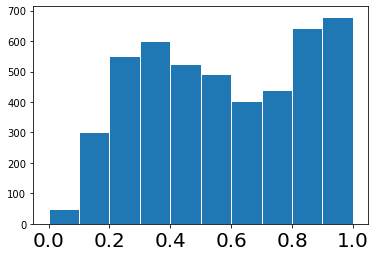

In [5]:
cols = [col for col in df_train.columns]
X = df[cols].values
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

plt.hist(X_minmax[:,2], edgecolor='white')

plt.xticks(fontsize=20)
plt.show()

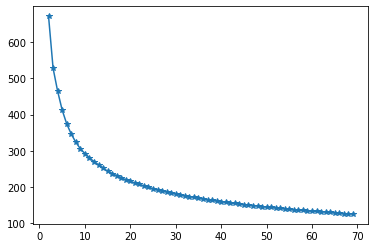

In [6]:
# kmeans
sse_list = list()
max_k = 70
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, )
    kmeans.fit(X_minmax)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list, marker='*')
plt.show()

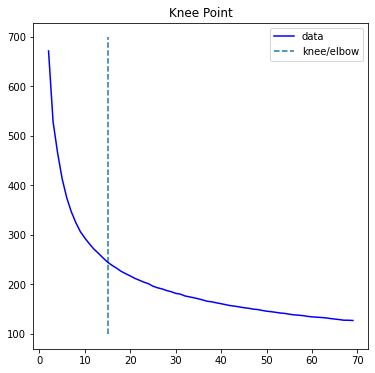

In [7]:
kl = KneeLocator(range(2, 70), sse_list, curve="convex", direction="decreasing")
kl.plot_knee()

In [8]:
print("knee: ", kl.knee)
print("elbow: ", kl.elbow)

knee:  15
elbow:  15


In [9]:
sil_list = []
max_k = 70
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, )
    kmeans.fit(X_minmax)
    sil = silhouette_score(X_minmax, kmeans.labels_)
    sil_list.append(sil)

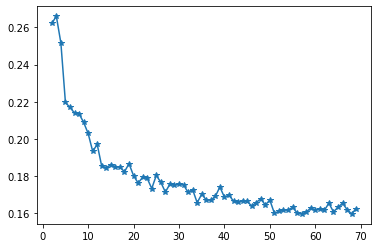

In [10]:
plt.plot(range(2,max_k), sil_list, marker='*')
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.2657441558343583
For n_clusters = 4 The average silhouette_score is : 0.25204917698178597
For n_clusters = 5 The average silhouette_score is : 0.21971366303695422
For n_clusters = 6 The average silhouette_score is : 0.21786468132746428
For n_clusters = 7 The average silhouette_score is : 0.2140151419643379
For n_clusters = 8 The average silhouette_score is : 0.21303745406521357
For n_clusters = 9 The average silhouette_score is : 0.2093607071575323
For n_clusters = 10 The average silhouette_score is : 0.2024554142950485
For n_clusters = 11 The average silhouette_score is : 0.19319798498673052
For n_clusters = 12 The average silhouette_score is : 0.1843921652781361
For n_clusters = 13 The average silhouette_score is : 0.1858367677424387
For n_clusters = 14 The average silhouette_score is : 0.1879646708229957
For n_clusters = 15 The average silhouette_score is : 0.18419054128188322
For n_clusters = 16 The average silhouette_score is 

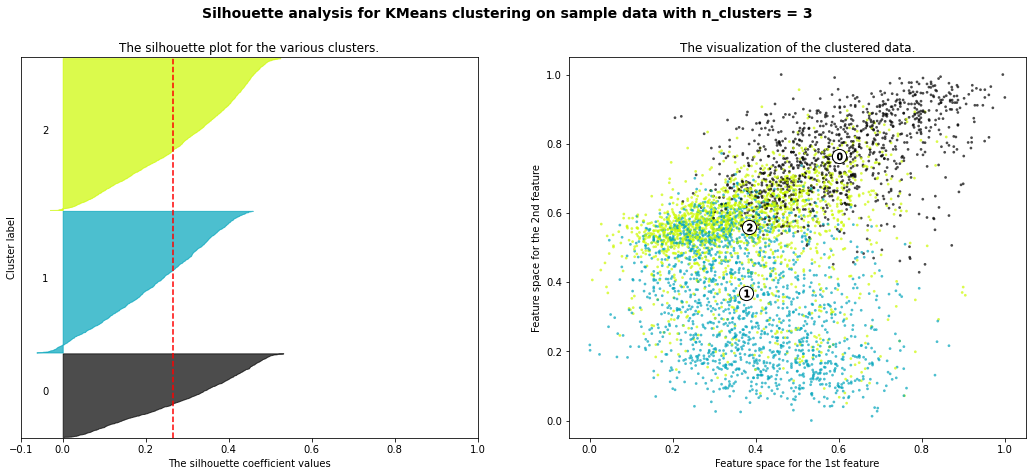

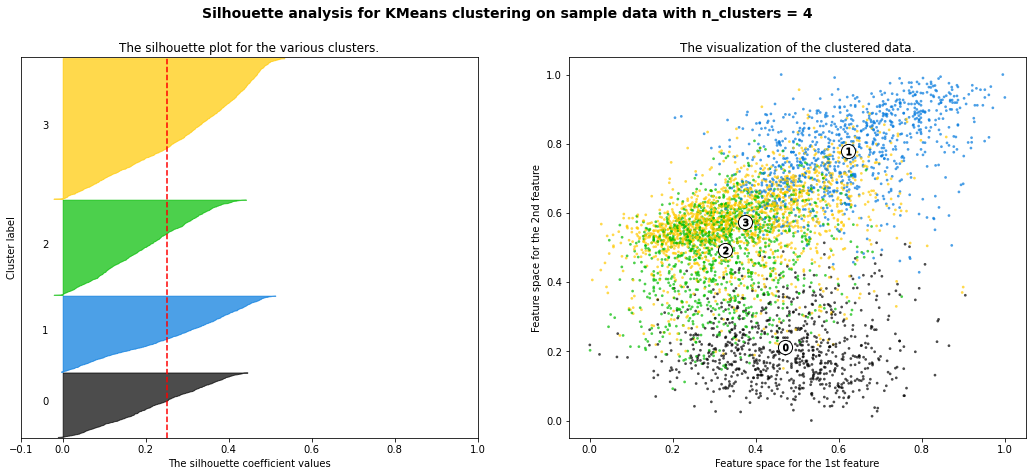

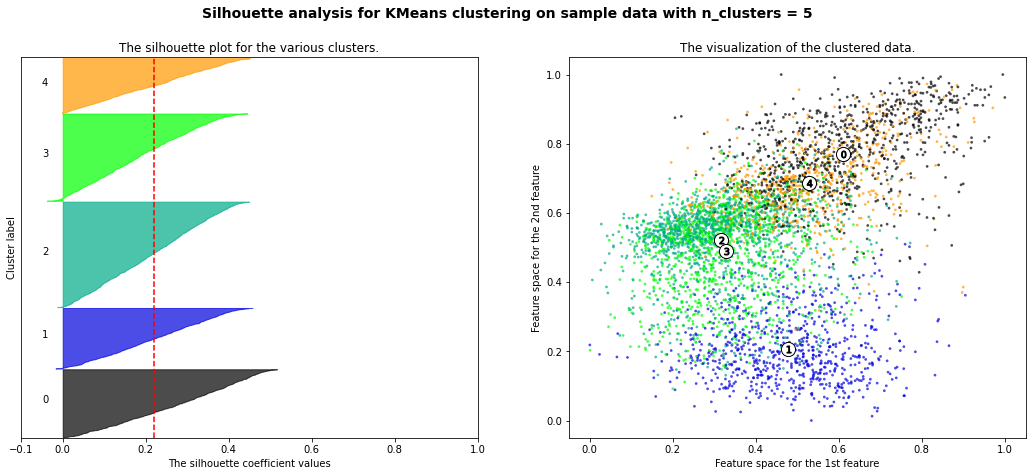

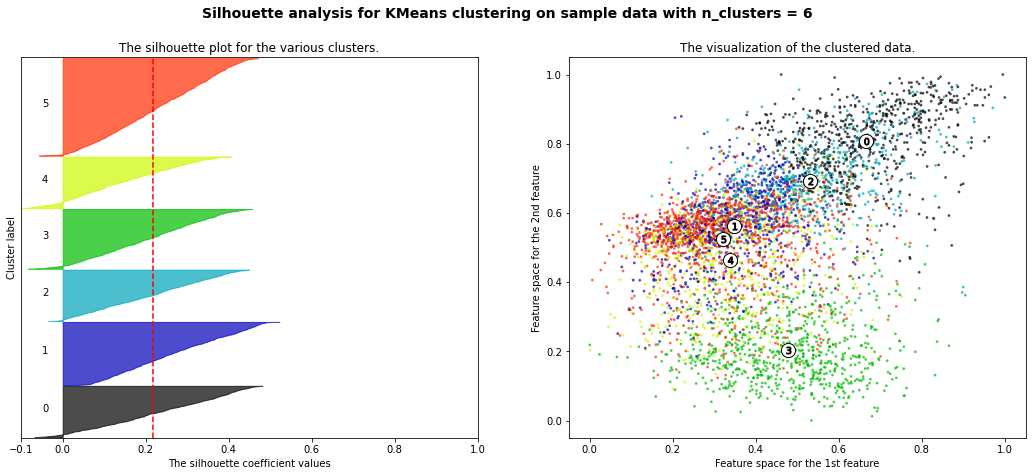

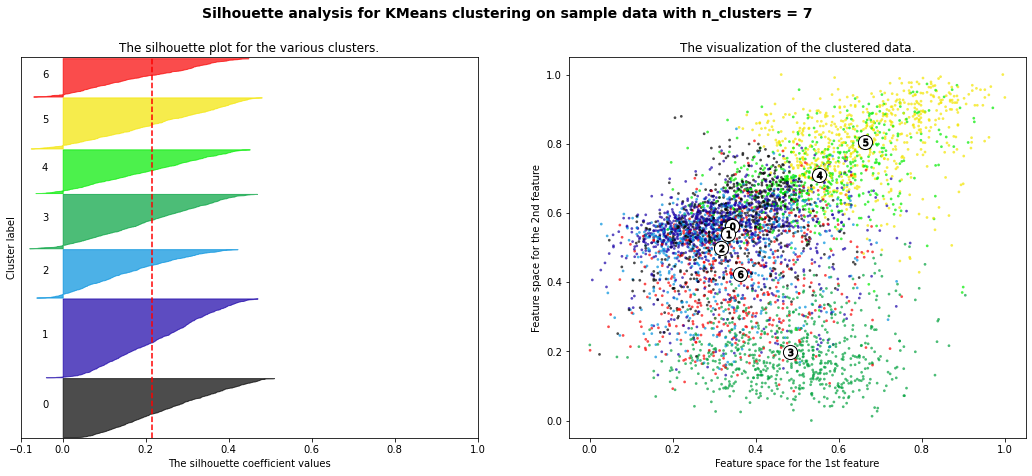

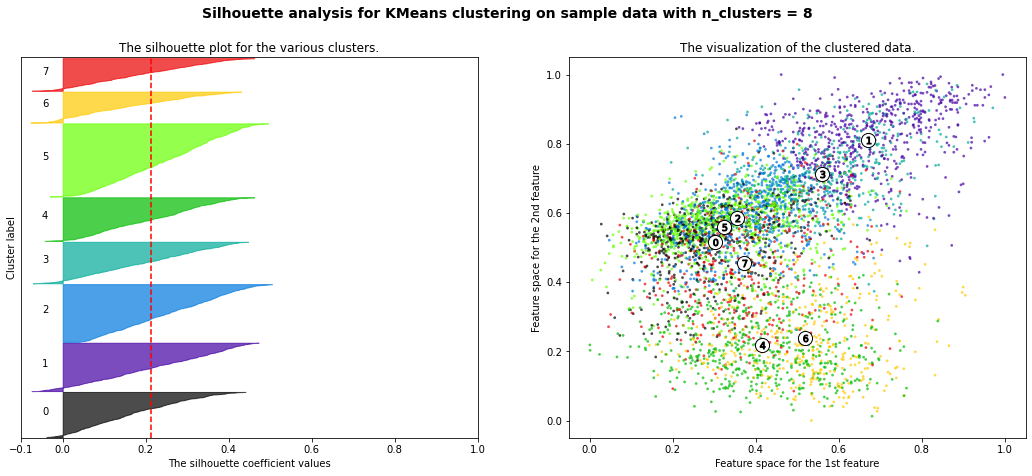

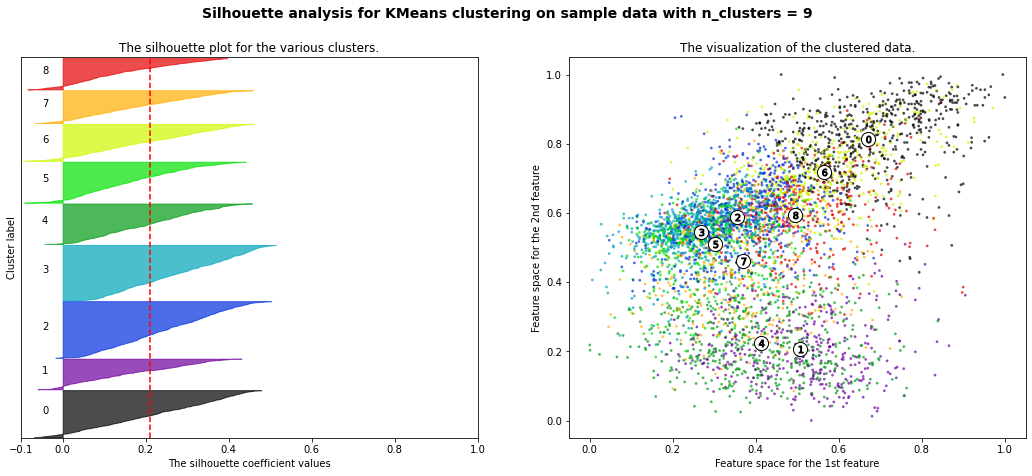

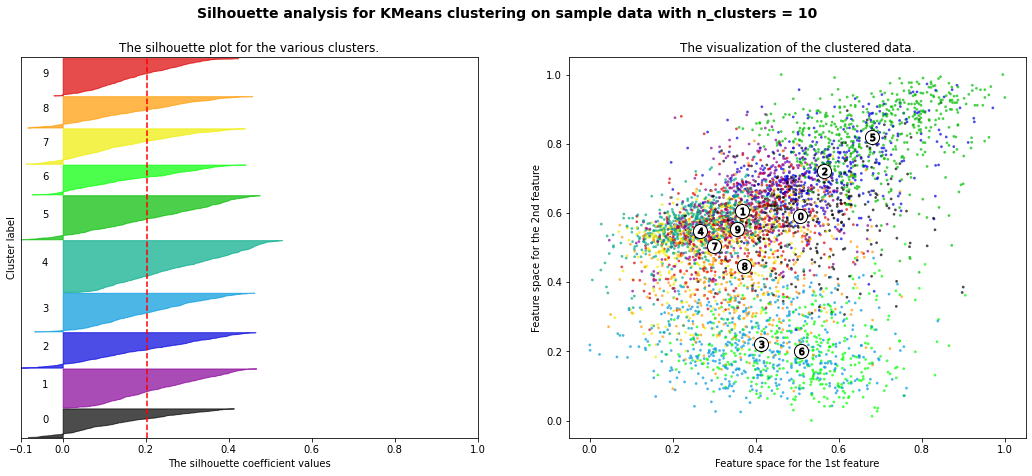

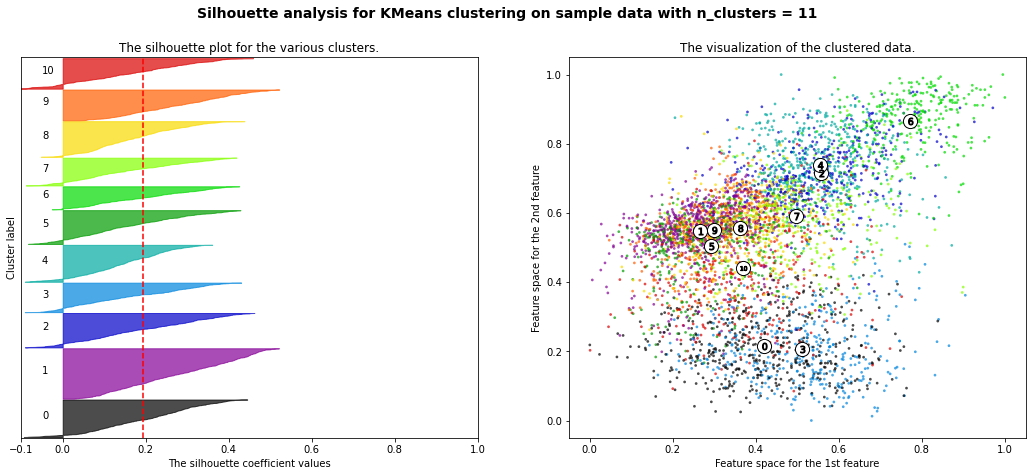

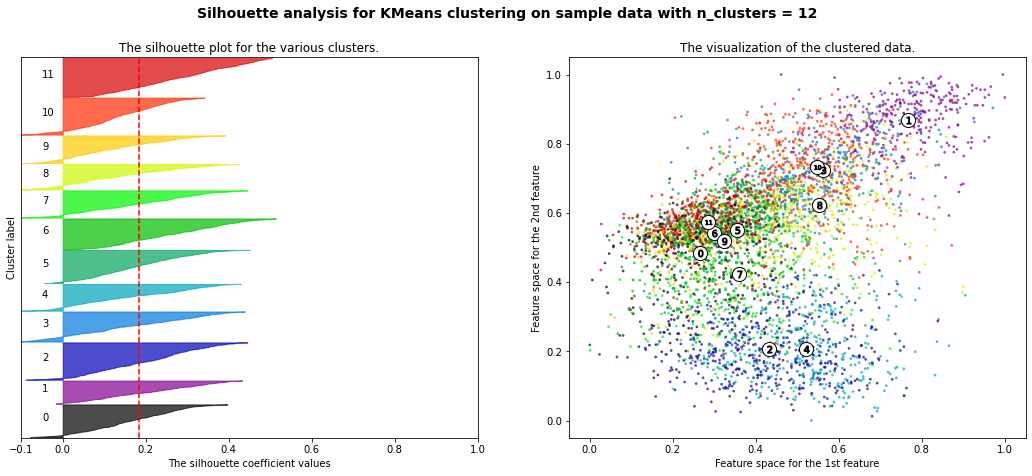

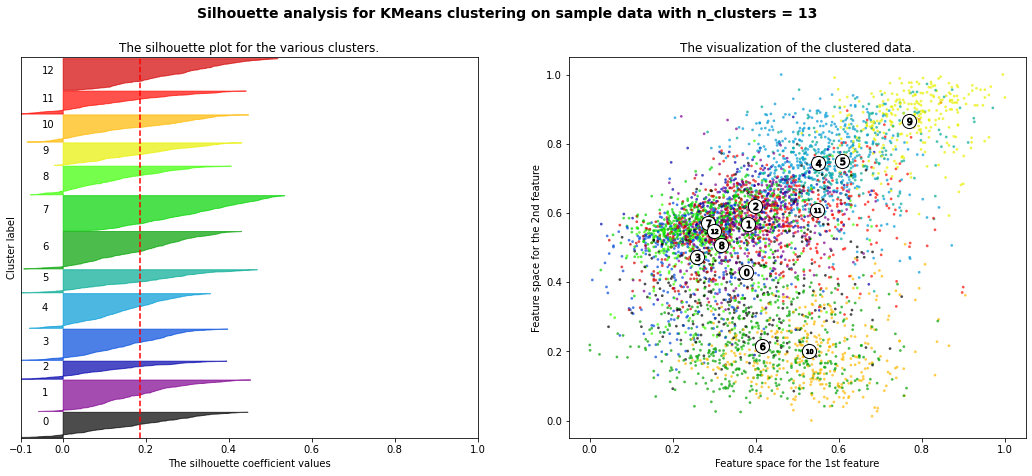

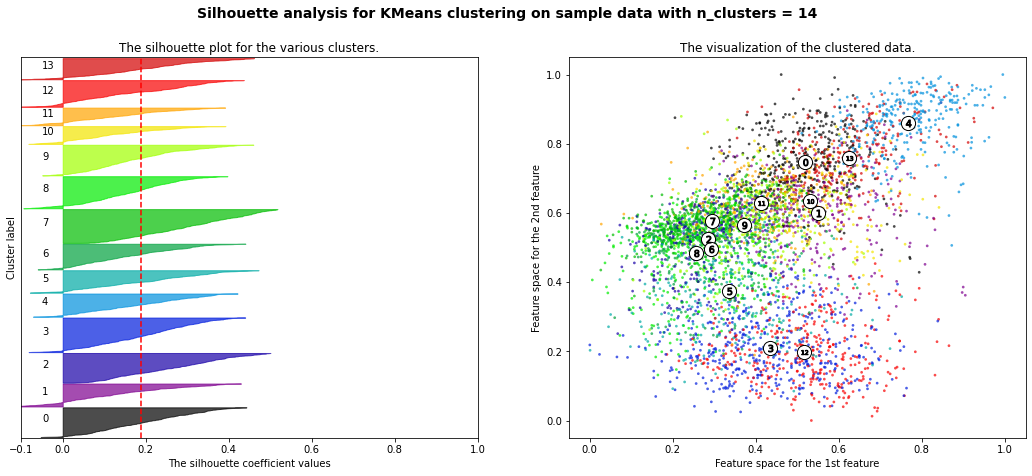

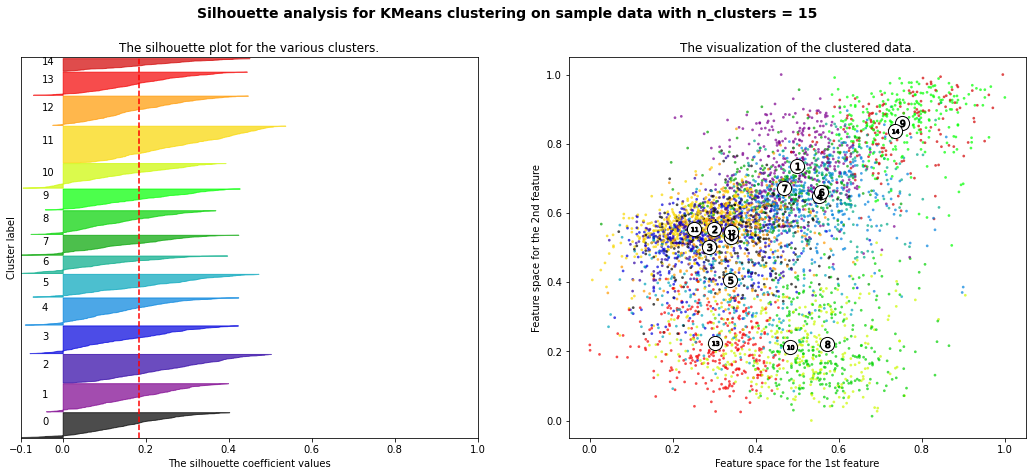

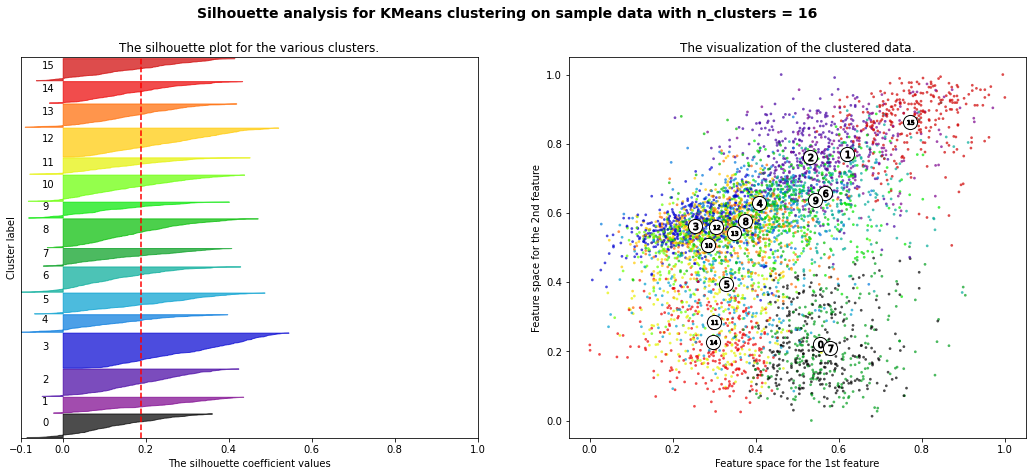

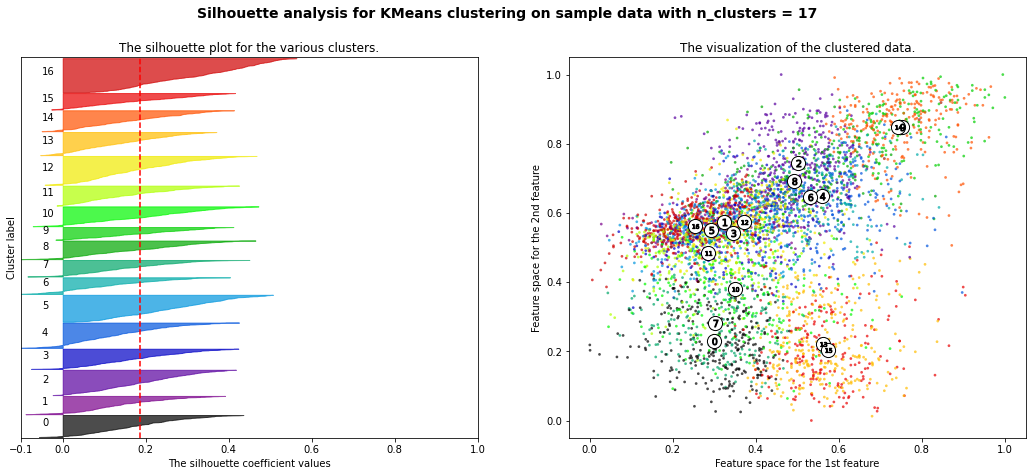

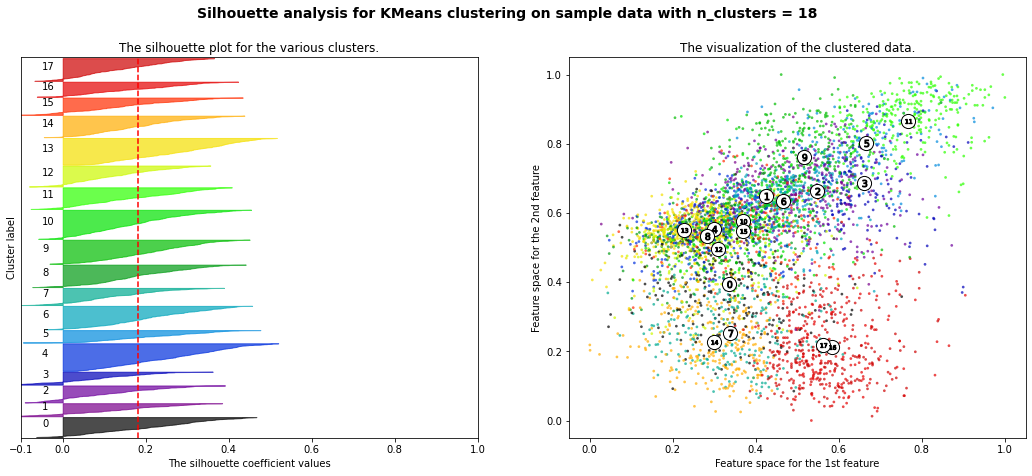

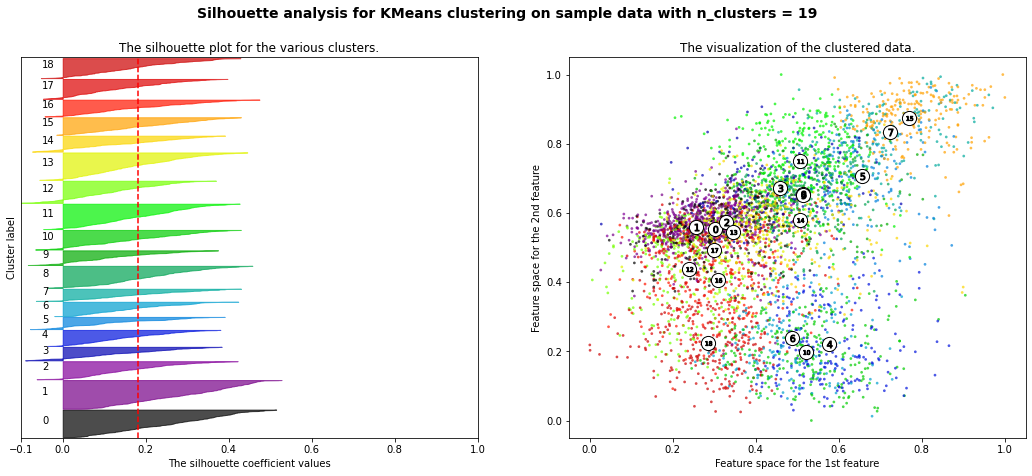

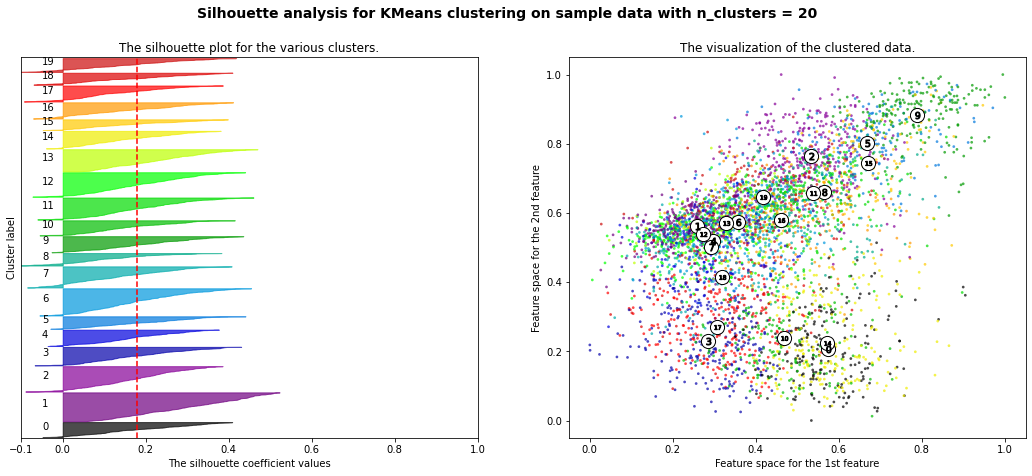

In [11]:
range_n_clusters = [3,4,5,6,7,8,9,10,11,12,13,14,15, 16, 17, 18, 19, 20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_minmax) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_minmax)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_minmax, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_minmax, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_minmax[:, 0], X_minmax[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

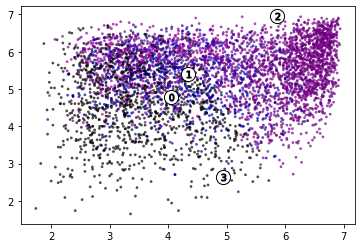

In [54]:

kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10, max_iter=100, )
kmeans.fit(X_minmax)
colors = cm.nipy_spectral(kmeans.labels_.astype(float) / n_clusters)
plt.scatter(
        X[:, 2], X[:, 3], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
 # Labeling the clusters
centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
# Draw white circles at cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

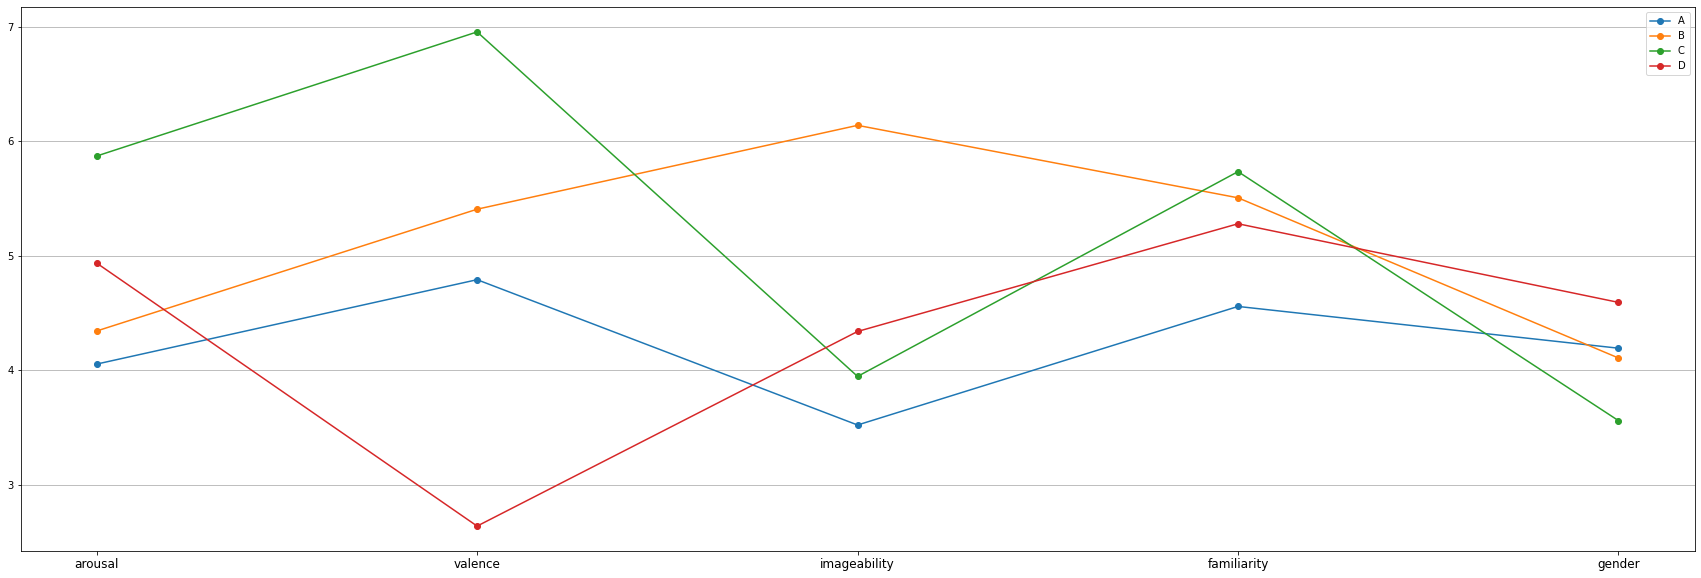

In [233]:
centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
plt.figure(figsize=(30, 10))

clust_name = ['A', 'B', 'C','D']
for i in range(len(centers)):
    plt.plot(centers[i], marker='o', label=clust_name[i])
    
plt.xticks(range(0,len(cols)), cols, fontsize=12)
plt.yticks(fontsize=10)

plt.legend(fontsize=10, loc='best')
plt.grid(axis='y')

[]

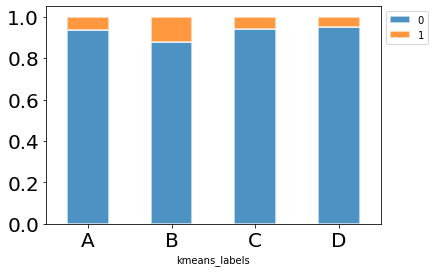

In [234]:
df_train['kmeans_labels'] = kmeans.labels_

bar_pl = df['polysemy'].groupby(df_train['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

In [235]:
df_train['kmeans_labels'].value_counts()

1    1749
0    1185
2     945
3     803
Name: kmeans_labels, dtype: int64

[]

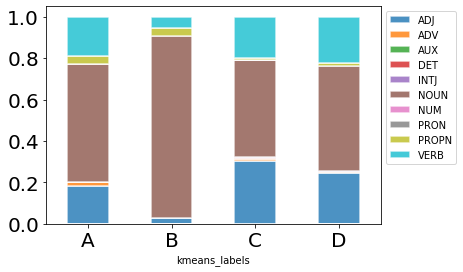

In [239]:
bar_pl = df['PoS'].groupby(df_train['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

[]

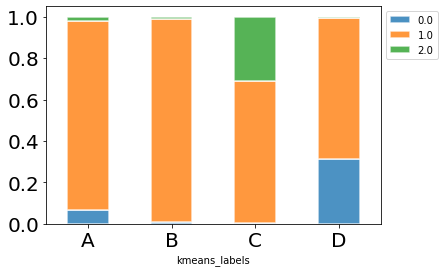

In [242]:
bar_pl = df['sentiment'].groupby(df_train['kmeans_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

# DBSCAN

In [182]:
train_data = df_train.values
#K=10
dist = pdist(train_data, 'euclidean')
dist = squareform(dist)

def kth_distance(k):
    kth_distances = []
    for d in dist:
        index_kth_distance = np.argsort(d)[k]
        kth_distances.append(d[index_kth_distance])
    return kth_distances

def plot_kth_distance(k):
    k_list = kth_distance(k)
    plt.plot(range(0, len(k_list)), sorted(kth_distances))
    plt.ylabel(f"dist from {k}th neighbor")     
    plt.show()

def plot_silhouette_on_eps(min_pts):
    sil_list = []
    range_list = np.arange(0.5,1.8,0.005)
    for e in range_list:
        dbscan = DBSCAN(eps=e, min_samples=min_pts, metric='euclidean')
        dbscan.fit(train_data)
        df_train['labels'] = dbscan.labels_
        if(len(df_train['labels'].unique()) <= 1):
            sil = 0
        else: 
            sil = silhouette_score(train_data, dbscan.labels_)
        sil_list.append(sil)
    plt.plot(range_list, sil_list, marker='*')
    plt.show()


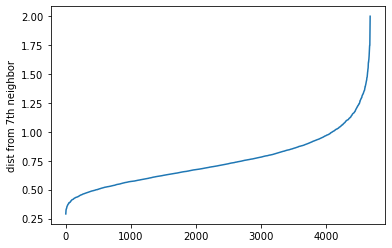

In [231]:
plot_kth_distance(7)

7


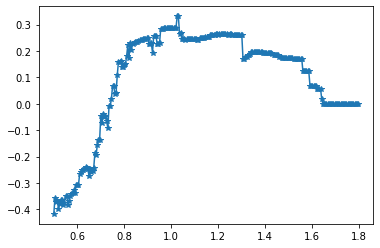

8


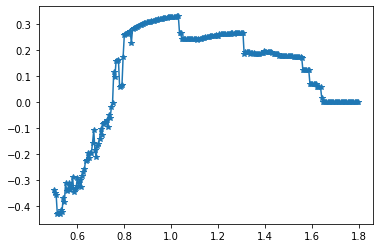

9


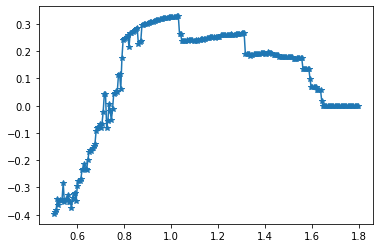

10


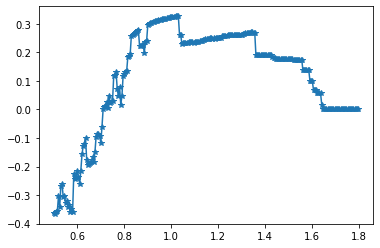

11


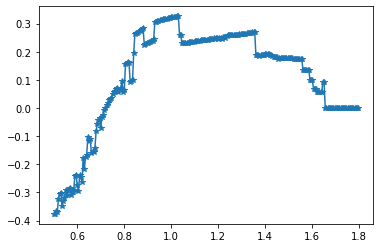

12


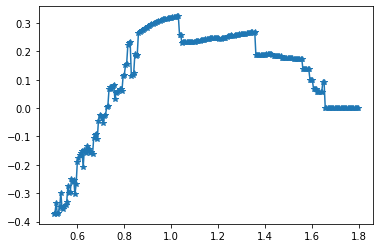

13


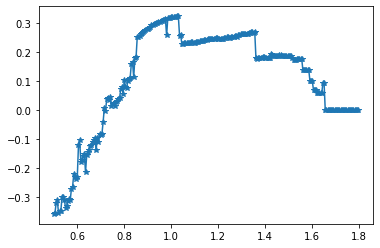

14


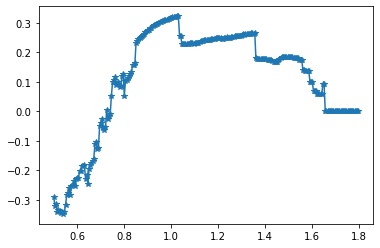

15


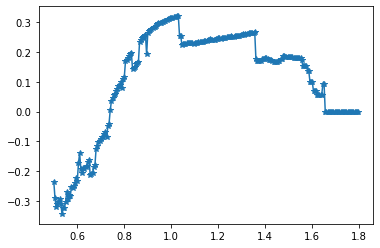

16


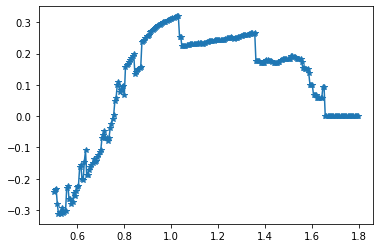

17


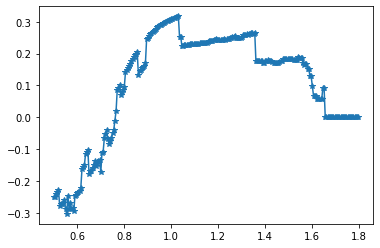

18


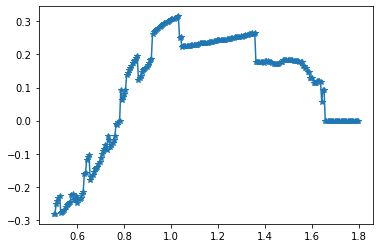

19


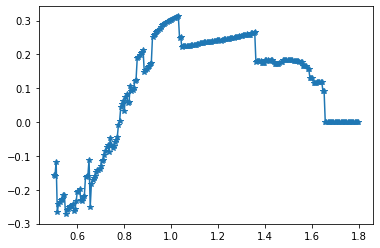

In [184]:
for min_pts in range(7,20):
    print(min_pts)
    plot_silhouette_on_eps(min_pts)

In [224]:
dbscan = DBSCAN(eps=1.03, min_samples=7, metric='euclidean')
dbscan.fit(train_data)
print('silhouette', silhouette_score(train_data, dbscan.labels_))

silhouette 0.33128629373407453


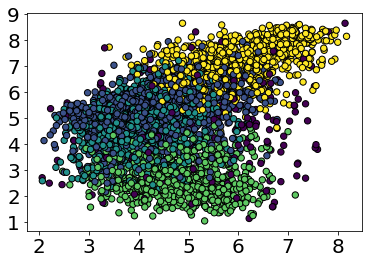

In [228]:
plt.scatter( X[:,0], X[:,1], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

[]

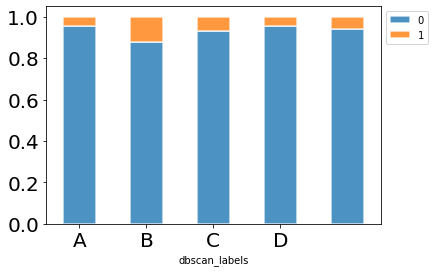

In [238]:
df_train['dbscan_labels'] = dbscan.labels_

bar_pl = df['polysemy'].groupby(df_train['dbscan_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

[]

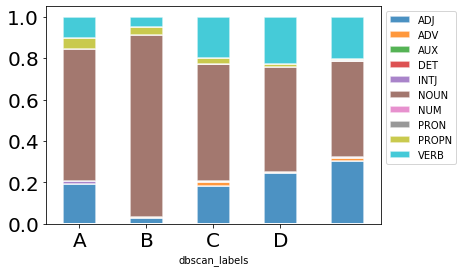

In [240]:
bar_pl = df['PoS'].groupby(df_train['dbscan_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()

[]

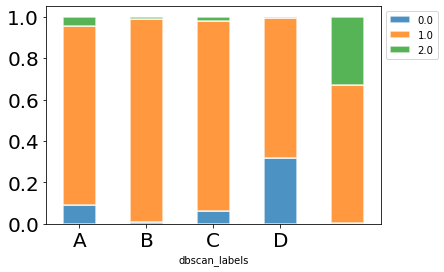

In [241]:
df_train['dbscan_labels'] = dbscan.labels_

bar_pl = df['sentiment'].groupby(df_train['dbscan_labels']).value_counts(normalize=True).unstack(1)
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1))

plt.plot()